In [9]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt



In [29]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [31]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [33]:
df.medv.shape

(506,)

In [35]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [62]:
lin_regression=LinearRegression()
mse= cross_val_score(lin_regression,x,y,scoring='neg_mean_squared_error',cv=5)
mean_msc=np.mean(mse)
print(mean_msc)

-37.13180746769902


In [113]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV



In [133]:
ridge=Ridge()
param_grid = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,130,170]
}
grid_regressor = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 130, 170]},
             scoring='neg_mean_squared_error')

In [117]:
print(grid_regressor.best_params_)
print(grid_regressor.best_score_)

{'alpha': 170}
-29.767787569998724


In [137]:
type(mse)

numpy.ndarray

In [139]:
msc

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

# Linear Regression

In [119]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [121]:
laso=Lasso()
param_grid = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,130,170]
}
lasso_regressor = GridSearchCV(laso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_regressor .fit(x,y)

C:\Users\A\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\A\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\A\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.797e+03, tolerance: 2.814e+00

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 130, 170]},
             scoring='neg_mean_squared_error')

In [123]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.53158022069486


In [95]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [125]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_grid=grid_regressor.predict(X_test)

In [127]:
import seaborn as sns

C:\Users\A\AppData\Local\Temp\ipykernel_9136\1028230056.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<Axes: xlabel='medv', ylabel='Density'>

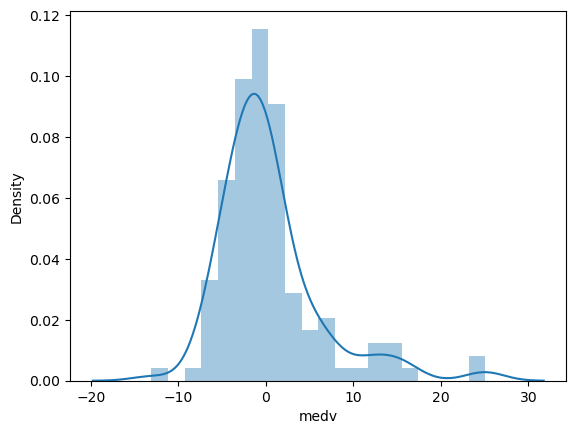

In [129]:
sns.distplot(y_test-prediction_lasso)

C:\Users\A\AppData\Local\Temp\ipykernel_9136\1546345525.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_grid)


<Axes: xlabel='medv', ylabel='Density'>

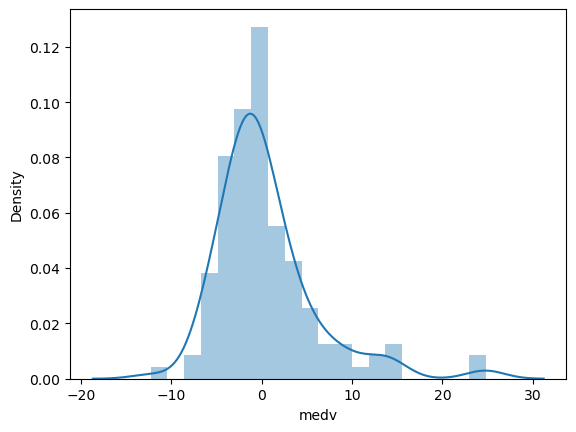

In [131]:
sns.distplot(y_test-prediction_grid)